### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 2
### Due: Monday, Feb 7th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Feb 7th.

---

## Problem 1

In the lecture you have seen how to fetch and plot quasar spectra using `fetch_sdss_spectrum` given the three parameters plate id, mjd, fiber id.

Look at the spectra of a number of quasars at different redshifts. How do the spectra change as redshift increases? 
(Hint: to get many quasars, try to vary the three parameters. The redshift $z$ is in the plot.)

Make a graph of quasar color as a function of redshift. How do you explain what you see in the graph?

How do spectra change at increasing redshift?


### Solution

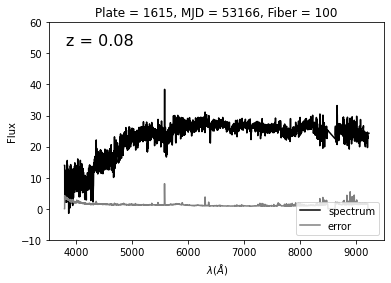

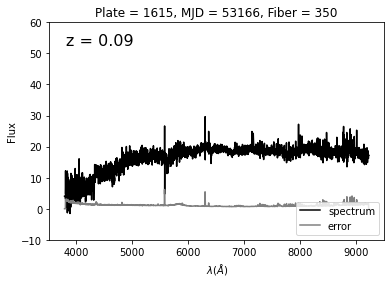

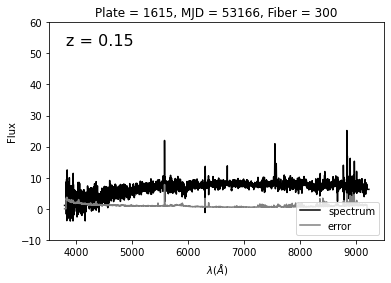

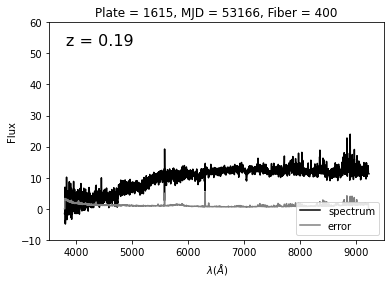

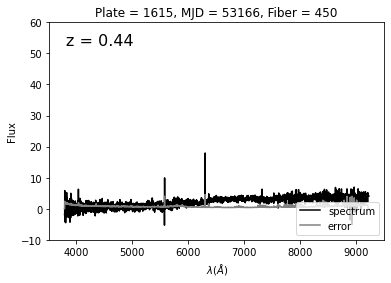

In [1]:
#------------------------------------------------------------
# Importing all the essential tools
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_spectrum


#------------------------------------------------------------
# Defining different plate, mjd, and fiber
plate = 1615
mjd = 53166
fiber = 100
fiber1 = 350
fiber2 = 300
fiber3 = 400
fiber4 = 450


#------------------------------------------------------------
# Calling finction to plot, variables: plate, mjd, fiber
def plotting(plate, mjd, fiber):
    spec = fetch_sdss_spectrum(plate, mjd, fiber)

    
#------------------------------------------------------------
# Plotting the resulting spectrum
    ax = plt.axes()
    ax.plot(spec.wavelength(), spec.spectrum, '-k', label='spectrum')
    ax.plot(spec.wavelength(), spec.error, '-', color='gray', label='error')

    ax.legend(loc=4)

    ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())

    ax.text(0.05, 0.95, 'z = %.2f' % spec.z, size=16,
            ha='left', va='top', transform=ax.transAxes)

    ax.set_xlabel(r'$\lambda (\AA)$')
    ax.set_ylabel('Flux')

    ax.set_ylim(-10, 60)

    plt.show()


#------------------------------------------------------------
# Plotting for different values of plate, mjd, and fiber 
plotting(plate, mjd, fiber)
plotting(plate, mjd, fiber1)
plotting(plate, mjd, fiber2)
plotting(plate, mjd, fiber3)
plotting(plate, mjd, fiber4)


We can approxiamte that the increase of redshift is giving us the decrease in the value of flux. And t=when the value of redshift is higher, the error is more closer to the value of flux.

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


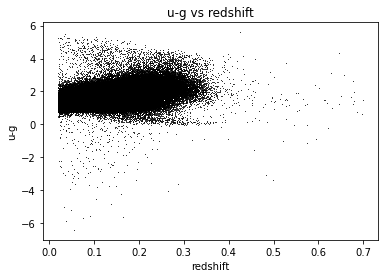

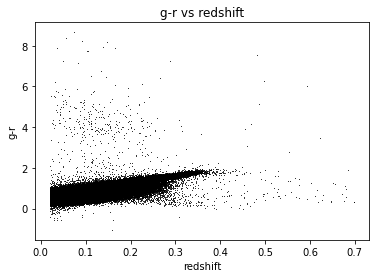

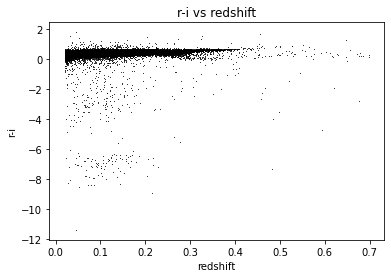

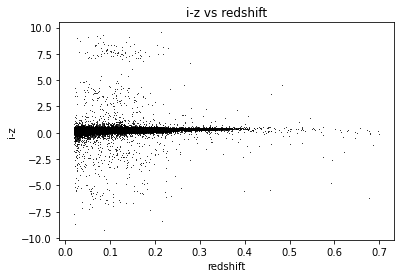

In [2]:
#------------------------------------------------------------
# Importing all the essential tools
import numpy as np
from matplotlib import pyplot as plt
from astroML.plotting import MultiAxes
from astroML.datasets import fetch_sdss_specgals

#------------------------------------------------------------
# Getting data from fetch_sdss_specgals()
data = fetch_sdss_specgals()

# select the first 10000 points


#------------------------------------------------------------
# Defining variables (redshift and color) to plot
          
redshift = data['z']
u_g = data['modelMag_u'] - data['modelMag_g']
g_r = data['modelMag_g'] - data['modelMag_r']
r_i = data['modelMag_r'] - data['modelMag_i']
i_z = data['modelMag_i'] - data['modelMag_z']


#------------------------------------------------------------
# Plotting u-g vs redshift
plt.figure()
ax = plt.axes()
plt.scatter(redshift, u_g, c='black', s=1, lw=0)
plt.ylabel('u-g')
plt.xlabel('redshift')
plt.title("u-g vs redshift")
plt.show()


#------------------------------------------------------------
# Plotting g-r vs redshift
plt.figure()
ax = plt.axes()
plt.scatter(redshift, g_r, c='black', s=1, lw=0)
plt.ylabel('g-r')
plt.xlabel('redshift')
plt.title("g-r vs redshift")
plt.show()


#------------------------------------------------------------
# Plotting r-i vs redshift
plt.figure()
ax = plt.axes()
plt.scatter(redshift, r_i, c='black', s=1, lw=0)
plt.ylabel('r-i')
plt.xlabel('redshift')
plt.title("r-i vs redshift")
plt.show()


#------------------------------------------------------------
# Plotting i-z vs redshift
plt.figure()
ax = plt.axes()
plt.scatter(redshift, i_z, c='black', s=1, lw=0)
plt.ylabel('i-z')
plt.xlabel('redshift')
plt.title("i-z vs redshift")
plt.show()



Here, we can see, the g-r vs redshift is the only plot where the value of color is changing with redshift. With the increase of redshift, the g-r is also increasing. In all the other plots, the color is independent of the change of redshift.

## Problem 2

Scatter plots are very useful when visualizing rather sparse, small data sets. Density plots are the right tool for visualizing rather dense, large data sets. 
As many astronomical data sets have both dense and sparse regions, a combination of both is often used.

Using data obtained with `fetch_sdss_S82standards`, generate a scatter plot with contours over dense regions.

### Solution



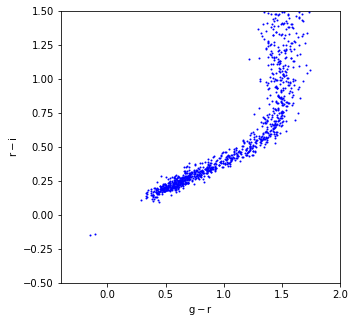

([<matplotlib.lines.Line2D at 0x1d400362ee0>],
 <matplotlib.contour.QuadContourSet at 0x1d400341430>)

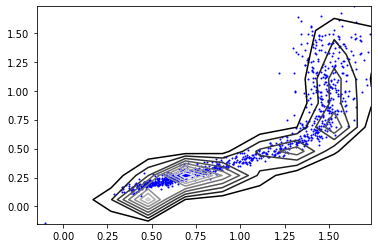

In [3]:
#------------------------------------------------------------
# Importing all the essential tools
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_S82standards
from astroML.plotting import scatter_contour


#------------------------------------------------------------
# Getting data from fetch_sdss_S82standards()
data = fetch_sdss_S82standards()
data = data[:1000]


#------------------------------------------------------------
# Defining variables (colors)
g_r = data['mmu_g'] - data['mmu_r']
r_i = data['mmu_r'] - data['mmu_i']


#------------------------------------------------------------
# PLotting r-i vs g-r
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(g_r, r_i, marker='.', markersize=2, color='blue', linestyle='none')

ax.set_xlim(-0.4, 2.0)
ax.set_ylim(-0.5, 1.5)

ax.set_xlabel(r'${\rm g - r}$')
ax.set_ylabel(r'${\rm r - i}$')

plt.show()


#------------------------------------------------------------
# Drawing contour
scatter_contour(g_r,r_i, threshold = 15, plot_args=dict(marker='.', linestyle='none', color='blue', 
                          markersize=2),contour_args=dict(cmap='gray', linestyles = 'solid'), filled_contour= False)